In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("data/mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [3]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro                          133955.913417
Guanajuato                         133277.965833
Nuevo León                         129221.985834
Distrito Federal                   128347.267365
Quintana Roo                       128065.415734
Chihuahua                          127073.851184
Jalisco                            123386.472237
Estado de México                   122723.490600
Campeche                           121734.633333
Puebla                             121732.974294
Guerrero                           119854.276015
Sonora                             114547.881798
Morelos                            112697.295615
Aguascalientes                     110543.888316
Baja California Sur                109069.339158
Yucatán                            108580.388526
Chiapas                            104342.313388
Veracruz de Ignacio de la Llave     96928.125254
Hidalgo                             94012.326563
Sinaloa                             93922.152490
Tamaulipas    

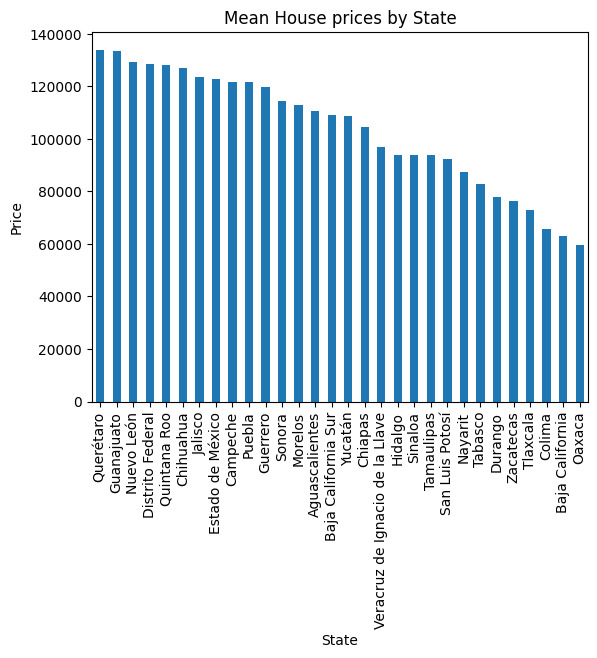

In [4]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price",
    title="Mean House prices by State"
);

In [5]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


In [6]:
mean_price_per_m2_by_state = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
mean_price_per_m2_by_state

state
Distrito Federal                   1175.889150
Estado de México                    763.753423
Guerrero                            761.557207
Jalisco                             743.568106
Quintana Roo                        736.455283
Nuevo León                          723.710042
Puebla                              700.701977
Querétaro                           687.227849
Oaxaca                              683.019737
Guanajuato                          672.908100
Baja California Sur                 662.401955
Morelos                             649.383991
Tabasco                             643.503347
Campeche                            601.291762
Nayarit                             599.293638
Baja California                     598.852981
Chihuahua                           591.226745
Chiapas                             560.317147
Sinaloa                             546.536311
Yucatán                             545.889477
Tamaulipas                          541.282079
Veracru

<Axes: title={'center': 'Mean Price per m2 by State'}, xlabel='State', ylabel='Price per m2'>

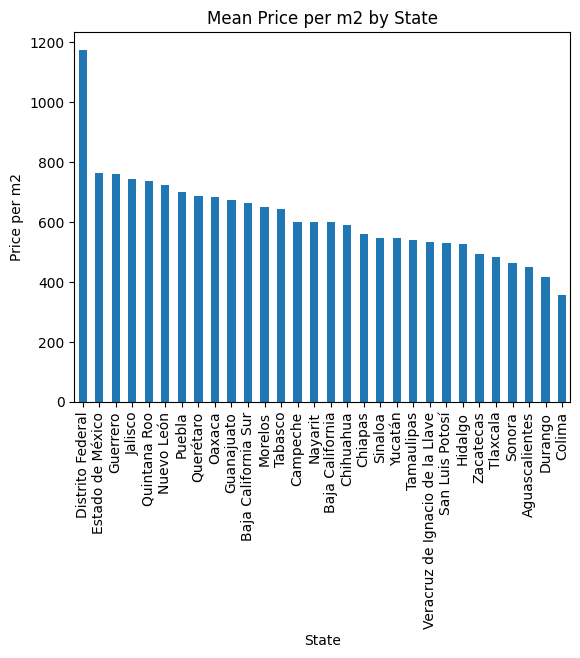

In [7]:
mean_price_per_m2_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price per m2",
    title="Mean Price per m2 by State"
)

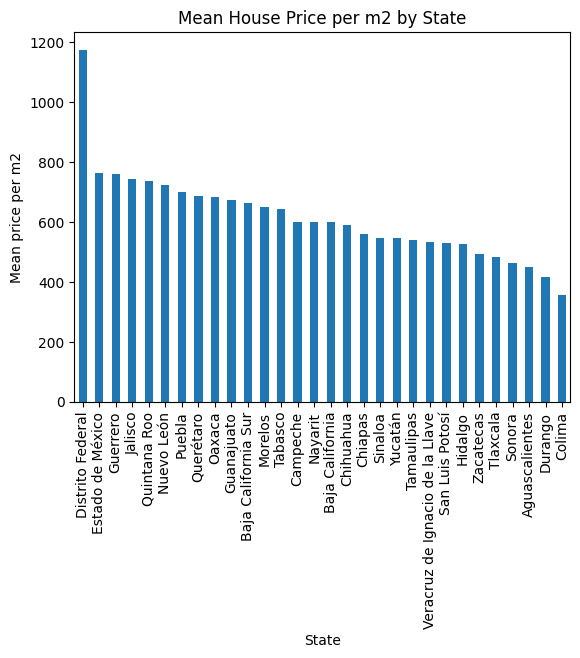

In [8]:
# Group `df` by "state", create bar chart of "price_per_m2"
(
    df
    .groupby("state")["price_per_m2"]
    .mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean price per m2",
        title="Mean House Price per m2 by State"
    )
);

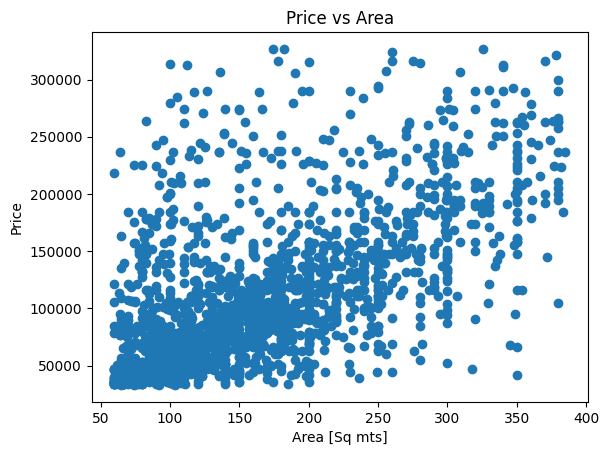

In [9]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"], y=df["price_usd"])

# Add x-axis label
plt.xlabel("Area [Sq mts]")

# Add y-axis label
plt.ylabel("Price")

# Add title
plt.title("Price vs Area");

In [10]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182454266905


In [11]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"] == "Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


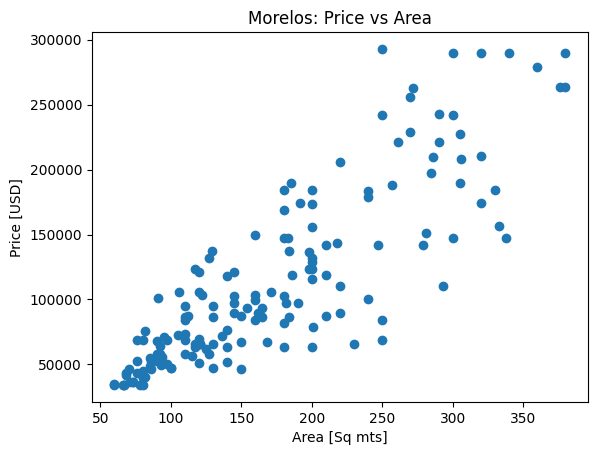

In [12]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])

# Add x-axis label
plt.xlabel("Area [Sq mts]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Morelos: Price vs Area");


In [13]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077614061476


df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.4107039205853436


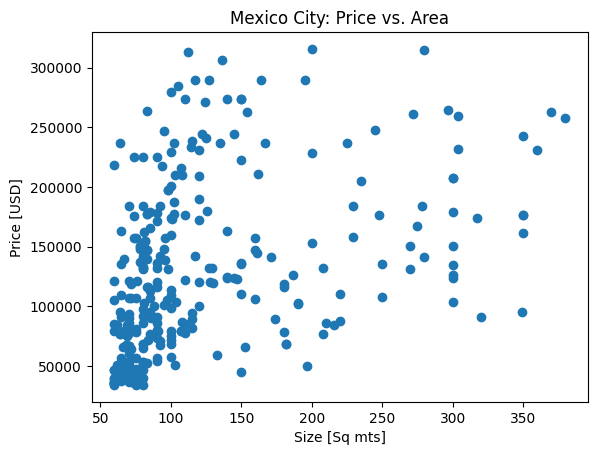

In [15]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])

# Add x-axis label
plt.xlabel("Size [Sq mts]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Mexico City: Price vs. Area");

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)